<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/LinearRegression/Multi_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTIPLE LINEAR REGRESSION**

**Context**

Predicting the MPG for Cars dataset


**Objective**

Building a predictive model.

**Dataset**

HP - Horse power

MPG - Miles per Gallon

VOL - Volume

SP - Speed

WT - weight

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Cars.csv to Cars.csv


In [4]:
df=pd.read_csv('Cars.csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
# Getting the statics of the data

print('shape:', df.shape)
print('size:', df.size)
print('columns:', df.columns)
print('Number of rows:' ,df.shape[0])
print('Number of columns:' ,df.shape[1])

shape: (81, 5)
size: 405
columns: Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')
Number of rows: 81
Number of columns: 5


In [6]:
df.info()        # getting the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
# Getting an idea about null values

df.isnull().sum().any()

False

False means that there are no null values

In [8]:
# correlation matrix
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


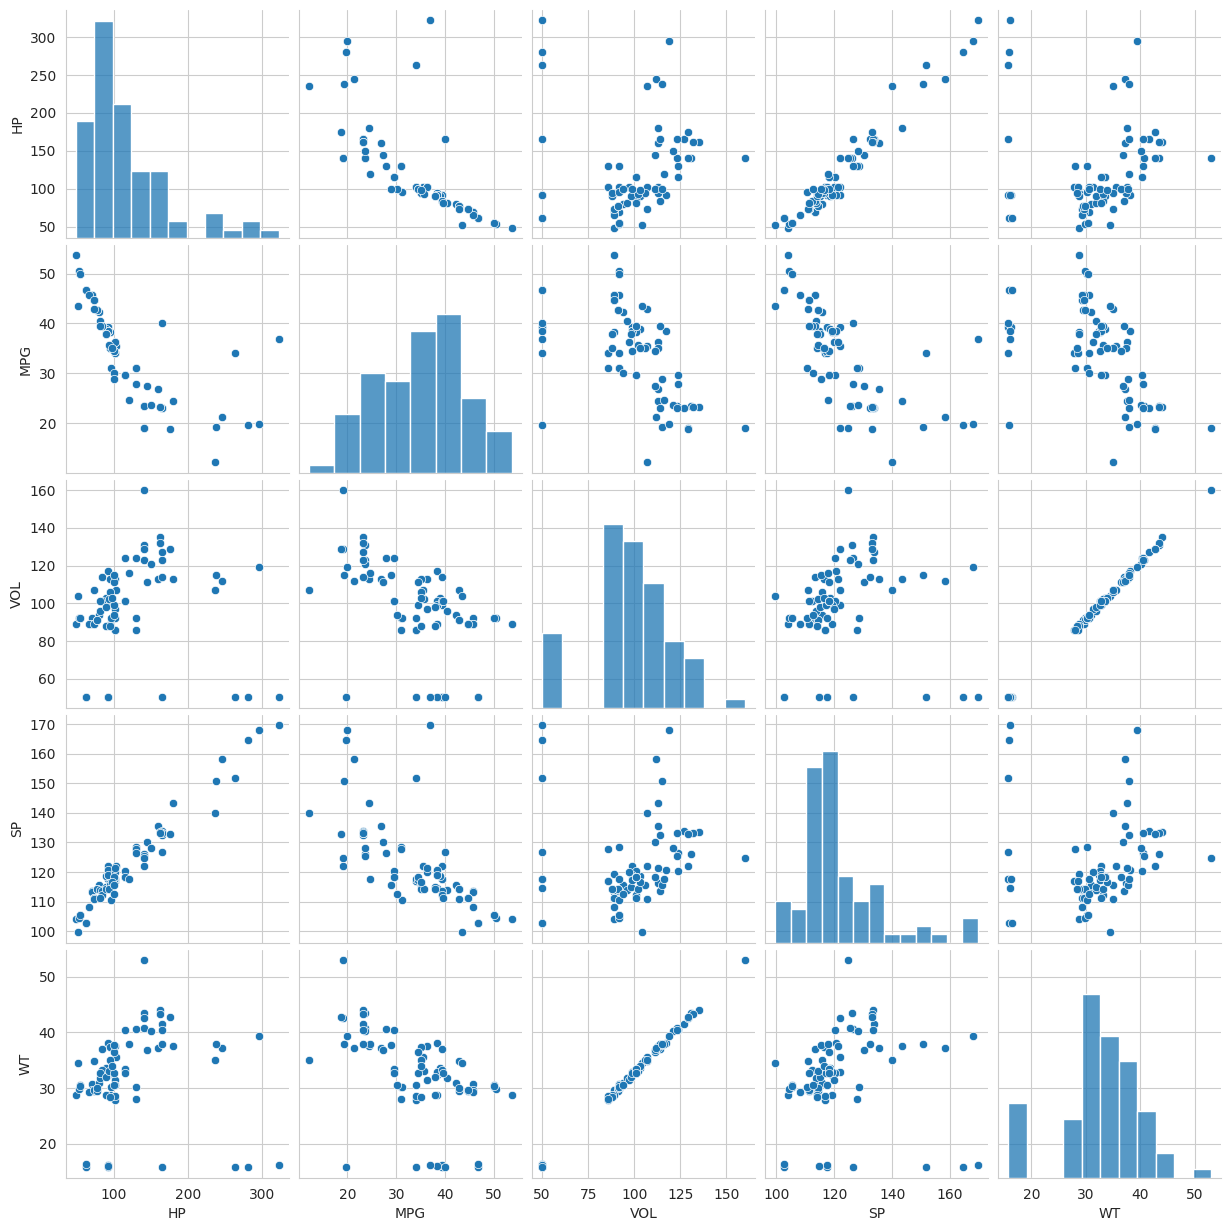

In [9]:
# pairplots
sns.set_style('whitegrid')
sns.pairplot(df)

In [10]:
# Homework : Derive the conclusions from the plot

Observations:


*   MPG vs WT,VOL,HP have negative correlation, as the weight, volume, and horsepower of the car increases, the milage per gallon tends to decrease.

*   Wt and VOL has a strong positive relation, as cars with higher weight are more likely to have larger volume.

* There is a positive correlation between HP and WT and also HP and VOL, as the cars with larger  weight and larger volume needs higher horsepower.

* SP and HP has strong positive correlation, as the horsepower of the car increases, its speed also increases.

In [11]:
# Preparing the model
model = smf.ols('MPG~WT+VOL+SP+HP', data=df).fit()

In [12]:
#coefficients
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [13]:
# Homework : write the equation from the prameters

**The general equation for a multiple linear Regression model is:**


```
# y= a0+ a1*x1 + a2*x2 + .....+ an*xn

```
* y is the dependent variable (MPG in this case)
a0 is the intercept (the value of y when all x's are 0)
* a1, a2, ..., an are the coefficients for each independent variable (WT, VOL, SP, HP)
* x1, x2, ..., xn are the independent variables



MPG= 30.677336 + 0.400574 * WT  - 0.336051 * VOL +0.395627 * SP - 0.205444 *HP

In [14]:
coefficients = model.params

# Create the equation string
equation = f"MPG = {coefficients['Intercept']:.3f}"  # Intercept
for variable, coefficient in coefficients.items():
    if variable != 'Intercept':
        equation += f" {coefficient:+.3f} * {variable}"

# Print the equation
print(equation)

MPG = 30.677 +0.401 * WT -0.336 * VOL +0.396 * SP -0.205 * HP


In [15]:
#t-values and p values
print(model.tvalues, '\n\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 

 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [16]:
# Homework: Interpret the t-values and give conclusion

**Interpreting t-values and p-values**

**WT :**
* WT has the t-value 0.2365 which is relatively small and it suggests a weak relationship between WT and MPG.
* WT has a p-value of 0.8136 which is greater than 0.05, indicates that the relationship between weight and MPG is not statistically significant.(means we do not have enough evidence to reject the null hypothesis).

**Conclusion :**
 Hence, we conclude there is weak relationship between WT and MPG.


**VOL**

* The t- value for volume is -0.59097, which is relatively small and negative indicating a weak negative relationship between VOL and MPG.

* The p-value for volume is 0.55629,which is greater than 0.05, indicates that the relationship between weight and MPG is not statistically significant.(means we do not have enough evidence to reject the null hypothesis).

**Conclusion :**
 Hence, we conclude there is weak relationship between VOL and MPG.


**SP**

* The t-value for SP is 2.499880 , which is relatively large and positive indicating a strong positive relationship between VOL and MPG.


*The p-value for SP is 0.014579, which is less than significance level of 0.05 indicates that the relationship between speed and MPG is statistically significant.

**Conclusion :**

Hence, we conclude there is moderately strong relationship between SP and MPG.


**HP**

* The t-value for HP is -5.238735 which is relatively large and negative indicating a strong negative relationship between HP and MPG.

* The p-value for HP is 0.000001, which is less than significance level of 0.05 indicating that the relationship between Horsepower and MPG is statistically significant.

**Conclusion :**

Hence, we conclude there is a strong negative relationship between HP and MPG.

In [17]:
# R squared
print(model.rsquared, '\n\n', model.rsquared_adj)

0.7705372737359842 

 0.7584602881431413


In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.54e-23
Time:                        06:31:58   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.0